<a href="https://colab.research.google.com/github/MohamedAazir/KiTS23_Kidney_Tumor_Segmentation/blob/Aazir/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aazir

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Restart runtime after installing if prompted by Colab
!pip install -q "torch" torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -q monai
!pip install -q nibabel scikit-image pandas tqdm SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 16.4 MB/s eta 0:00:00


In [6]:
import os, json, glob

root = "/content/drive/MyDrive/kits23/dataset"   # your root

case_folders = sorted([d for d in glob.glob(os.path.join(root, "case_*")) if os.path.isdir(d)])

datalist = {"training": []}

for case_path in case_folders:
    case_id = os.path.basename(case_path)
    # main label for the case
    label_path = os.path.join(case_path, "segmentation.nii.gz")

    # Adjusted path — go inside the 'instances' subfolder
    instance_folder = os.path.join(case_path, "instances")

    # Get all NIfTI files inside that folder
    image_paths = sorted(glob.glob(os.path.join(instance_folder, "*.nii.gz")))

    # print(f"Case: {os.path.basename(case_path)}")
    # print("Found images:")
    # for img in image_paths:
    #     print("  ", img)

    datalist["training"].append({
        "image": os.path.relpath(image_path, start=root),
        "label": os.path.relpath(label_path, start=root),
        "image_filename": os.path.basename(image_path)
    })

dataset_json = {
    "name": "KiTS23_custom",
    "description": "KiTS23 formatted dataset from per-case folders",
    "reference": "",
    "licence": "",
    "release": "0.0",
    "modality": {"0": "CT"},
    "labels": {"0": "background", "1": "kidney_and_mass", "2": "mass", "3": "tumor"},
    "numTraining": len(datalist["training"]),
    "training": datalist["training"],
    "test": []
}

with open(os.path.join(root, "dataset.json"), "w") as f:
    json.dump(dataset_json, f, indent=2)

print("dataset.json created with", len(datalist["training"]), "cases")


dataset.json created with 489 cases


Shape: (602, 512, 512)
Data type: float64
Affine:
 [[ 0.          0.         -0.79882812  0.        ]
 [ 0.         -0.79882812  0.          0.        ]
 [-0.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.        ]]


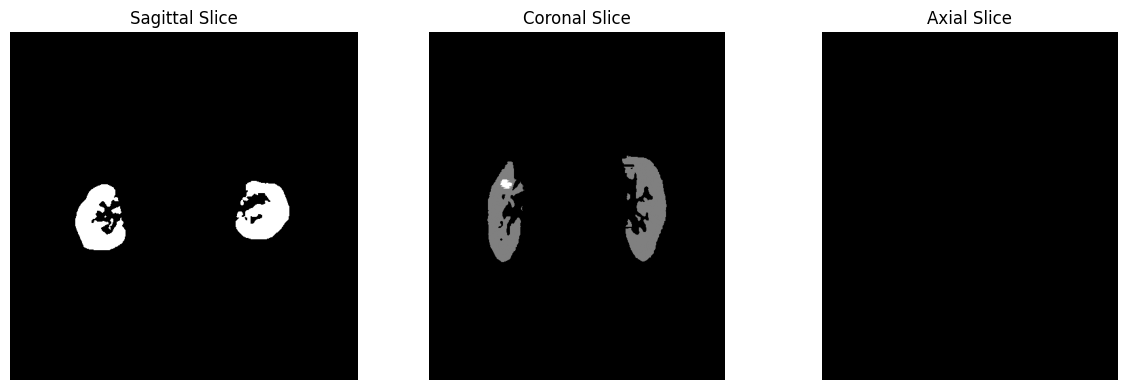

In [11]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Path to your file (update this!)
image_path = r"/content/drive/MyDrive/kits23/dataset/case_00001/segmentation.nii.gz"

# --- Load the NIfTI file ---
img = nib.load(image_path)
data = img.get_fdata()

print("Shape:", data.shape)
print("Data type:", data.dtype)
print("Affine:\n", img.affine)

# --- Visualize a few slices ---
# pick middle slices along each axis
slices = [data.shape[0] // 2, data.shape[1] // 2, data.shape[2] // 2]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(data[slices[0], :, :], cmap='gray')
axes[0].set_title("Sagittal Slice")

axes[1].imshow(data[:, slices[1], :], cmap='gray')
axes[1].set_title("Coronal Slice")

axes[2].imshow(data[:, :, slices[2]], cmap='gray')
axes[2].set_title("Axial Slice")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import glob

root = "/path/to/your/dataset"

case_paths = sorted(glob.glob(os.path.join(root, "case_*")))

for case_path in case_paths:
    instance_folder = os.path.join(case_path, "instances")
    nii_files = sorted(glob.glob(os.path.join(instance_folder, "*.nii.gz")))

    for nii_file in nii_files:
        img = nib.load(nii_file)
        data = img.get_fdata()
        print(f"{os.path.basename(nii_file)} -> shape: {data.shape}")

        plt.imshow(data[:, :, data.shape[2] // 2], cmap='gray')
        plt.title(os.path.basename(nii_file))
        plt.axis('off')
        plt.show()


In [12]:
pip install nibabel matplotlib numpy


In [14]:
import nibabel as nib
import numpy as np

img = nib.load("/content/drive/MyDrive/kits23/dataset/case_00001/segmentation.nii.gz")
data = img.get_fdata()
print("Unique values:", np.unique(data))


Unique values: [0. 1. 2.]


Shape: (602, 512, 512)
Unique labels: [0. 1. 2.]


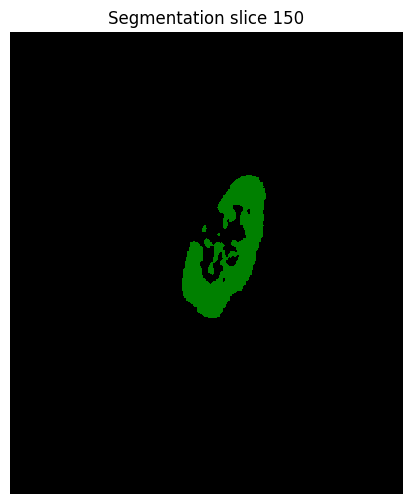

In [19]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# --- Path to segmentation file ---
seg_path = r"/content/drive/MyDrive/kits23/dataset/case_00001/segmentation.nii.gz"

# --- Load segmentation ---
seg_img = nib.load(seg_path)
seg_data = seg_img.get_fdata()

print("Shape:", seg_data.shape)
print("Unique labels:", np.unique(seg_data))

# --- Pick a slice ---
z = 150
seg_slice = seg_data[:, :, z]

# --- Define a color map (for up to 3 labels) ---
colors = ["black", "purple", "green"]  # 0=background, 1=kidney, 2=tumor
cmap = ListedColormap(colors)

# --- Display ---
plt.figure(figsize=(6,6))
plt.imshow(seg_slice, cmap=cmap, interpolation='none')
plt.title(f"Segmentation slice {z}")
plt.axis('off')
plt.show()
